# Name: Charles Nana Kwakye
# Student number: r0879035
# Date: 12-10-2023
# Description: Benchmarking Machine Learning Algorithms

## Reason for choosing the dataset

The first reason why I choose the bank notes dataset is because it conforms to the requirements given which is it must have minimal 5 different attributes, and minimal 100 instances which it did have. It also was not used in class.

The second reason why I choose the bank notes dataset is because it is a binary classification problem which is a type of supervised learning problem where the goal is to predict discrete values. In this case, the goal is to predict whether a given banknote is real or fake based on four features extracted from its image.

## Explorative Data Analysis (EDA) of the dataset
### Ref : Bing Ai 
### Prompt: Can you give me some Exploratory Dtata Analysis (EDA) to do on a dataset I have chosen for ML classification

### Summary of output
* Check for number of row and columns
* Check for missing values
* Check for data types
* Check for outliers
* Check for class imbalance

In [58]:
#import bank notes data from resources folder
import pandas as pd
#import desicion tree classifier from sklearn
from sklearn.tree import DecisionTreeClassifier
bank_notes_data = pd.read_csv("resources/bank_notes.csv")
bank_notes_data.head()


,variance,skewness,curtosis,entropy,Target
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [59]:
#change column "Target" to "Class" 
bank_notes_data = bank_notes_data.rename(columns={"Target": "Authentication"})
bank_notes_data.head(10)

,variance,skewness,curtosis,entropy,Authentication
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [60]:
#check for the number of rows and columns
print("The instances and features are:",bank_notes_data.shape)

The instances and features are: (1372, 5)


In [61]:
#check for missing values
print("The number of missing values are:",bank_notes_data.isnull().sum())

The number of missing values are: variance          0
skewness          0
curtosis          0
entropy           0
Authentication    0
dtype: int64


In [62]:
#check for data types
print("The data types are:",bank_notes_data.dtypes)

The data types are: variance          float64
skewness          float64
curtosis          float64
entropy           float64
Authentication      int64
dtype: object


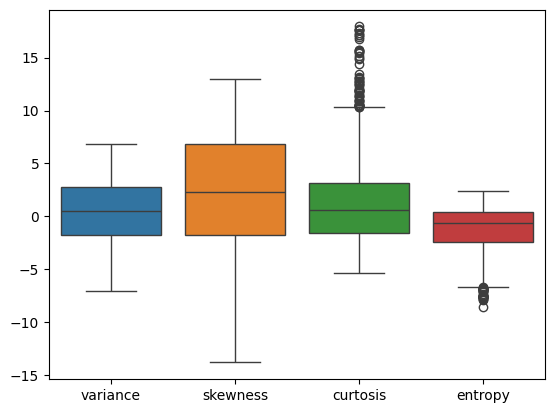

In [63]:
#check for outliers in the data but do not plot the aunthentication column
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(data = bank_notes_data.drop(columns = ['Authentication']))
plt.show()

Since my outliers are due to natural variation in the data, which is the variation of sizes of the banknotes I will not remove them from the dataset. I will however scale the data to make sure that the data is not biased towards the features with the largest values.

In [64]:
bank_notes_data.describe()

,variance,skewness,curtosis,entropy,Authentication
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [ ]:

# normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(bank_notes_data)

data_scaled = pd.DataFrame(data_scaled, columns=bank_notes_data.columns)
data_scaled

# save data to csv
data_scaled.to_csv('resources/bank_notes_scaled.csv', index=False)

,variance,skewness,curtosis,entropy,Authentication
0,0.769004,0.839643,0.106783,0.736628,0.0
1,0.835659,0.820982,0.121804,0.644326,0.0
2,0.786629,0.416648,0.310608,0.786951,0.0
3,0.757105,0.871699,0.054921,0.450440,0.0
4,0.531578,0.348662,0.424662,0.687362,0.0
...,...,...,...,...,...
1367,0.537124,0.565855,0.165249,0.726398,1.0
1368,0.407690,0.332868,0.506753,0.808350,1.0
1369,0.237385,0.011768,0.985603,0.524755,1.0
1370,0.250842,0.201701,0.761587,0.660675,1.0


2. Spliting the data into training and test sets
### Ref:  GitHub Copilot Chat:
### Prompt: summary for spliting the data into test and training sets

Splitting the data into training and test sets is an important step in machine learning. It allows us to evaluate the performance of our model on unseen data. In this step, we randomly divide the dataset into two parts: a training set and a test set. The training set is used to train the model, while the test set is used to evaluate its performance. The test set should be representative of the data we expect to encounter in the real world. Typically, we use a 70/30 or 80/20 split for training and testing respectively.

In [66]:
# split the data into train and test
bank_notes_data = data_scaled
feature_cols = ['variance', 'skewness', 'curtosis', 'entropy']

x = bank_notes_data[feature_cols]
y = bank_notes_data[['Authentication']] # target variable

In [67]:
# split x and y into training and testing sets
from sklearn.model_selection import train_test_split # import train_test_split function from sklearn

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25) # 75% training and 25% test

In [68]:
# train the model on training set 
clf = DecisionTreeClassifier() # create the object of the model
clf = clf.fit(x_train, y_train) # fit the model with the training data

Graphically view the actual decision tree model that was built using the training data. This is done using the graphviz library. The graphviz library is a Python interface for the Graphviz graph visualization software package. It provides a simple API for creating and saving visualizations of decision trees.

#### Ref:  GitHub Copilot 

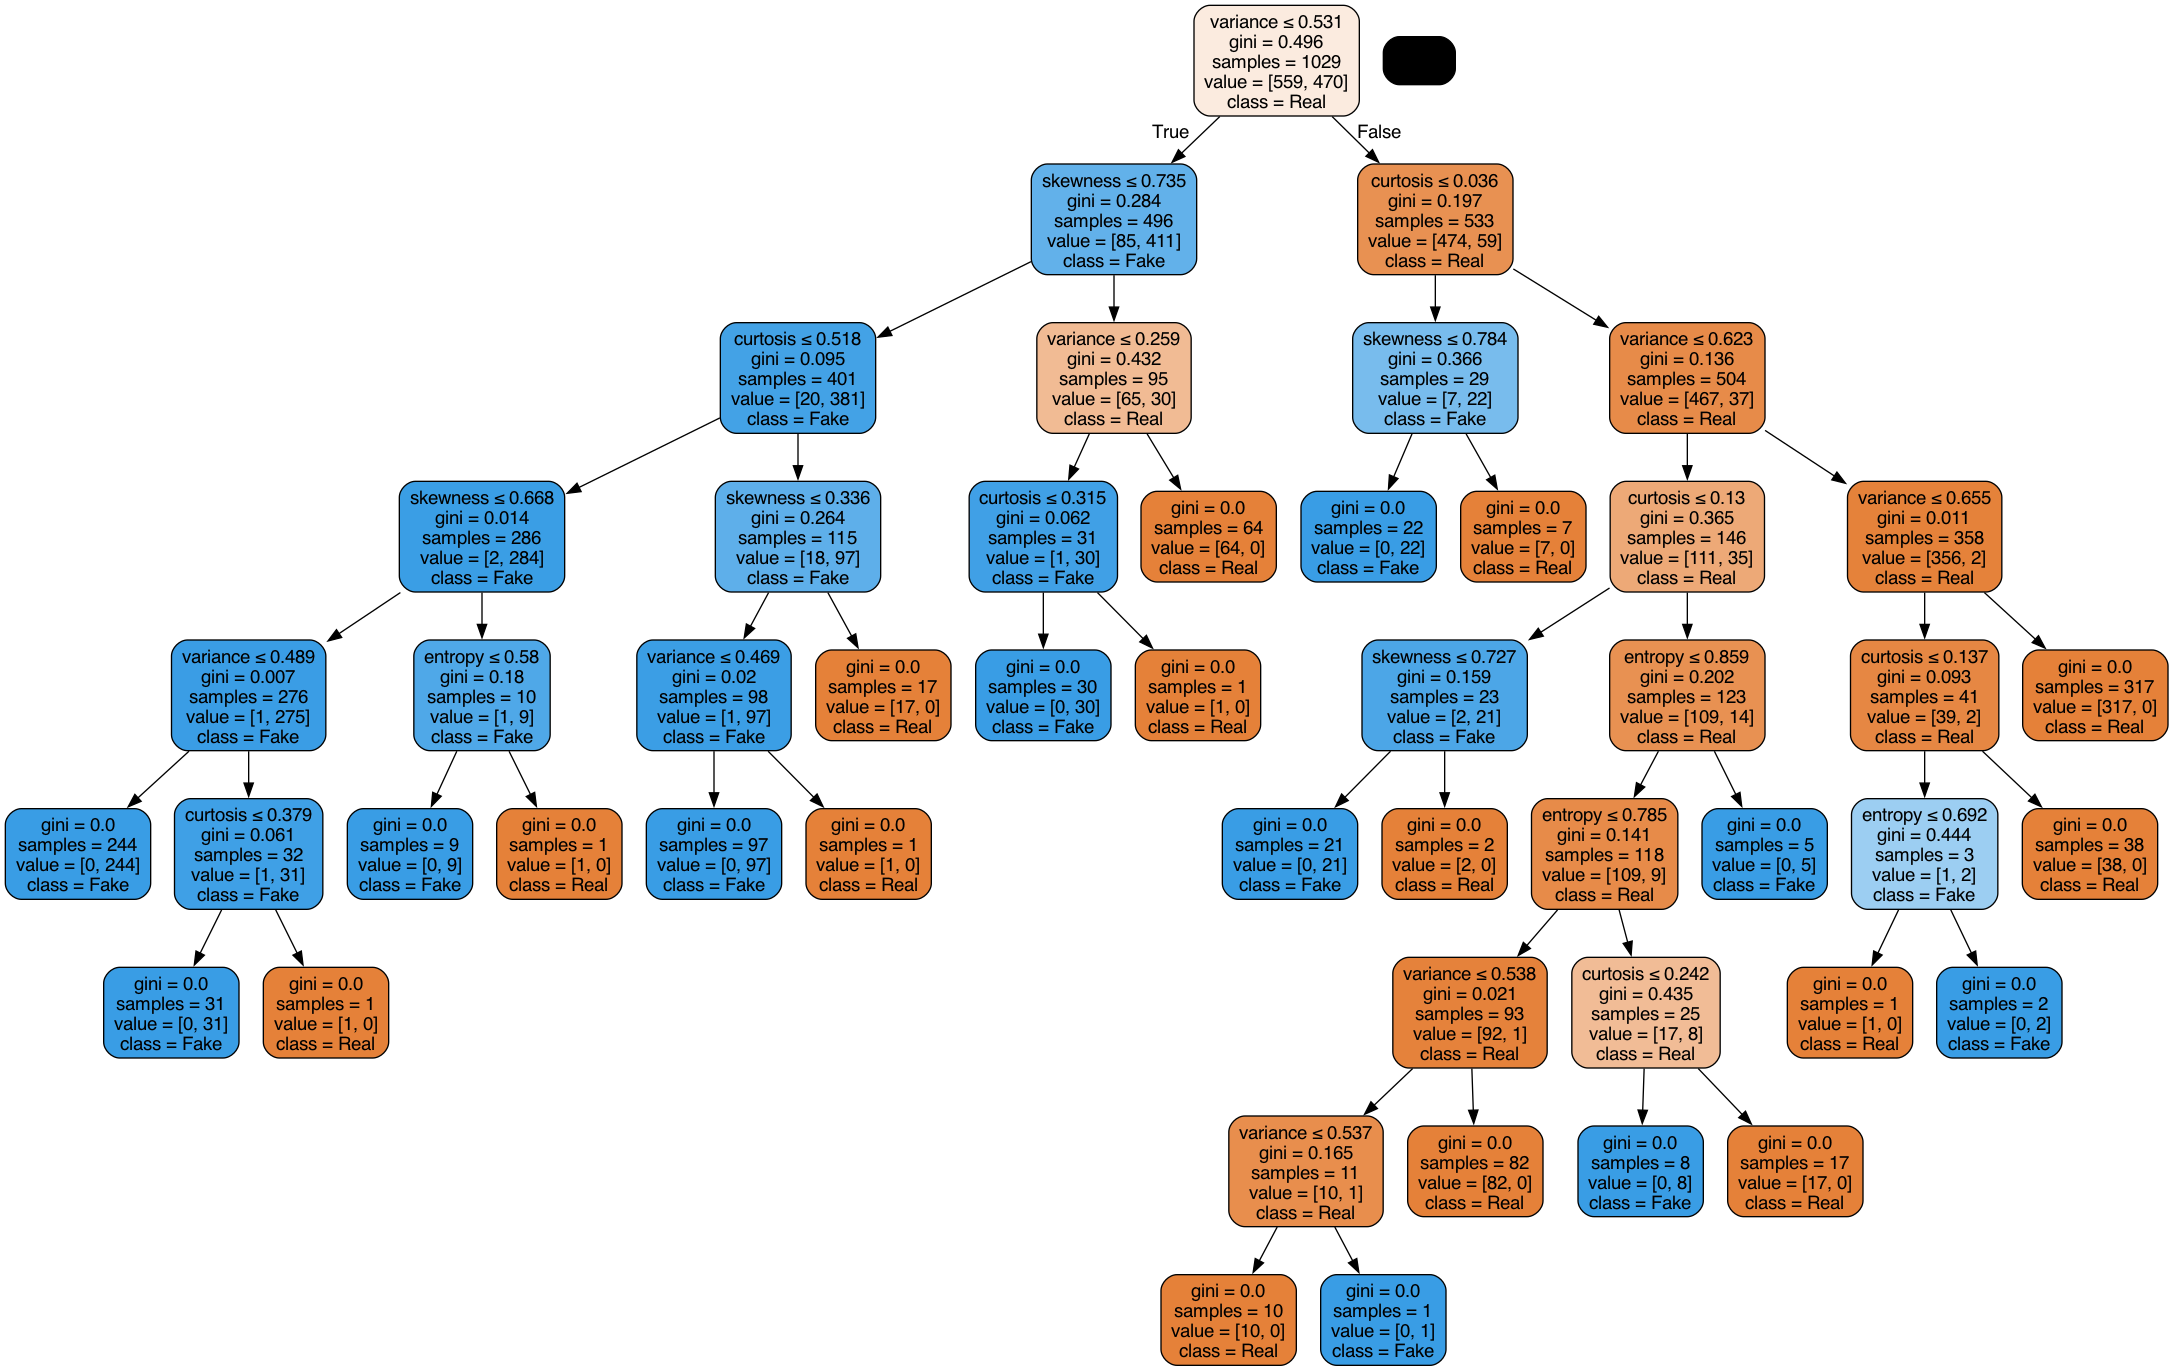

In [69]:
from io import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz # import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled = True, rounded = True,
                special_characters = True, feature_names = feature_cols, class_names=['Real','Fake'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(), width = 550) # display the tree


Now that we have trained our model, it’s time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the banknotes data.

#### Ref:  Iris dataset Exercise

In [70]:
# test the model
import numpy as np
tree_predict = clf.predict(x_test) # test the model on test data

After training, check the accuracy using actual and predicted values.

In [71]:
from sklearn import metrics # import metrics module from sklearn
print("Accuracy:",metrics.accuracy_score(y_test, tree_predict)) # calculate accuracy of the model on test data


Accuracy: 0.9883381924198251


## Explanation of the confusion matrixes using an example
[[156  33]
 [ 27 127]]

The confusion matrix above is made up of two axes, the y-axis (vertical) is the true value for the authenticity of the banknote and the x-axis (horizontal) is the authenticity that the Decision Tree has predicted for this banknote. For example, the top-left cell shows that 156 real banknotes were correctly predicted as real, while the bottom-right cell shows that 127 fake banknotes were correctly predicted as fake. The off-diagonal cells show the misclassifications. For example, the top-right cell shows that 33 real banknotes were wrongly predicted as fake, while the bottom-left cell shows that 27 fake banknotes were wrongly predicted as real.

### Ref: Iris dataset Exercise(confusion matrix part)

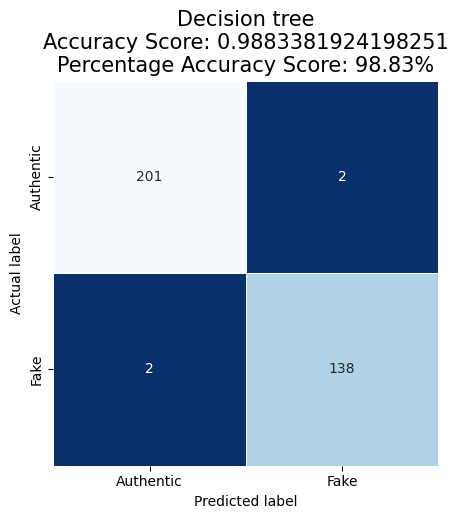

In [72]:
# create confusion matrix
from sklearn.metrics import confusion_matrix


decisionTreeClassifierCM = confusion_matrix(y_test, tree_predict)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.heatmap(decisionTreeClassifierCM, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r',cbar=False, xticklabels=['Authentic', 'Fake'], yticklabels=['Authentic', 'Fake'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
accuracy_score = metrics.accuracy_score(y_test, tree_predict)
percentage_accuracy_score = f'{accuracy_score:.2%}'
all_sample_title = f'Decision tree\nAccuracy Score: {accuracy_score}\nPercentage Accuracy Score: {percentage_accuracy_score}'

plt.title(all_sample_title, size = 15)
plt.show()

### Machine Learning Algorithm 2 : Gaussian Naive Bayes

The reason why I choose the Gaussian Naive Bayes algorithm is because it is a simple yet powerful algorithm for predictive modeling. It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. For example, a fruit may be considered to be an apple if it is red, round, and about 3 inches in diameter. Even if these features depend on each other or upon the existence of the other features, a naive Bayes classifier would consider all of these properties to independently contribute to the probability that this fruit is an apple.

Suppose you are a bank employee and you have to check whether a banknote is real or fake. You have a device that can measure four features of the banknote: variance, skewness, curtosis, and entropy. You also have a database of previous banknotes that have been labeled as real or fake. You want to use this information to classify a new banknote.

You can use Gaussian Naive Bayes to calculate the probability of the banknote being real or fake based on the four features. You assume that the features are independent of each other and follow a normal distribution for each class. You use the database to estimate the mean and variance of each feature for each class, as well as the prior probability of each class. You then plug in the values of the features of the new banknote into the formula of Gaussian Naive Bayes and get the posterior probability of each class. You compare the two probabilities and choose the class with the higher one as your prediction. For example, if the probability of the banknote being real is 0.8 and the probability of it being fake is 0.2, you predict that the banknote is real.
Formaula for Gaussian Naive Bayes:

P(xi​∣Ck​)=2πσk,i2​​1​e−2σk,i2​(xi​−μk,i​)2​

#### Bing AI + GitHub Copilot Chat + My understanding:
##### Prompt: Use a scenario of bank employee and understanding of the Gaussian Naive Bayes Algo to explain it in a very short and concise manner of how the algorithm works



Train the model using the training sets using the Gaussian Naive Bayes algorithm.

In [73]:
from sklearn.naive_bayes import GaussianNB #import Gaussian Naive Bayes model

clf = GaussianNB()
clf.fit(x_train, y_train)
gaussianAlgoPred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, gaussianAlgoPred))

Accuracy: 0.8658892128279884


/Users/charlesnanakwakye/AI Project/Lessons/ML_env/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


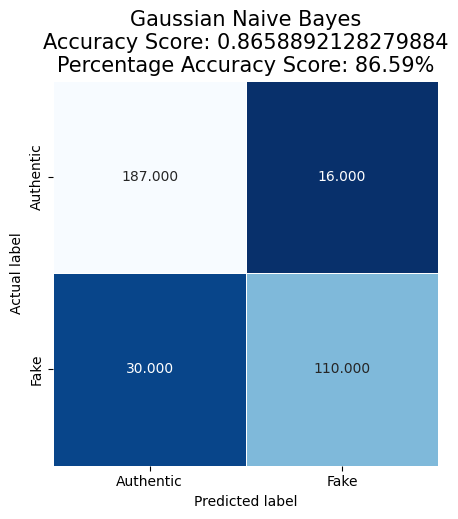

[[187  16]
 [ 30 110]]


In [74]:
#print the confusion matrix

gaussianAlgoPredCM = confusion_matrix(y_test, gaussianAlgoPred)
plt.figure(figsize=(5,5))
sns.heatmap(gaussianAlgoPredCM, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', cbar=False, xticklabels=['Authentic', 'Fake'], yticklabels=['Authentic', 'Fake'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

accuracy_score = metrics.accuracy_score(y_test, gaussianAlgoPred)
percentage_accuracy_score = f'{accuracy_score:.2%}'
all_sample_title = f'Gaussian Naive Bayes\nAccuracy Score: {accuracy_score}\nPercentage Accuracy Score: {percentage_accuracy_score}'
plt.title(all_sample_title, size = 15)
plt.show()

#print array of confusion matrix
print(gaussianAlgoPredCM)

### Machine Learning Algorithm 3 : Gradient Boosting
The reason why I choose the gradient boosting algorithm is because it is a powerful and flexible algorithm for predictive modeling. It is an ensemble technique that combines multiple weak learners (such as decision trees) into a strong learner by iteratively adding new learners that correct the errors of the previous ones. In simple terms, a gradient boosting classifier learns from the mistakes of the previous classifiers and improves the accuracy of the final prediction.

#### Bing AI: Prompt 1: Explain in a very short and concise manner

#### Bing AI: Prompt 2: Give me a python code on how to implement the Gradient Boosting Algorithm
#### Bing AI: Prompt 3: I thought I needed a base ml model to implement the gradient boosting algorithm
#### The output explained it further to my understanding that these other weak models are trained when the gradient boosting algorithm is implemented


Train the model using the training sets using the Gradient Boosting algorithm.

In [75]:
# import gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()
clf.fit(x_train, y_train)
gradientBoostingAlgoPred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, gradientBoostingAlgoPred))

/Users/charlesnanakwakye/AI Project/Lessons/ML_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9970845481049563


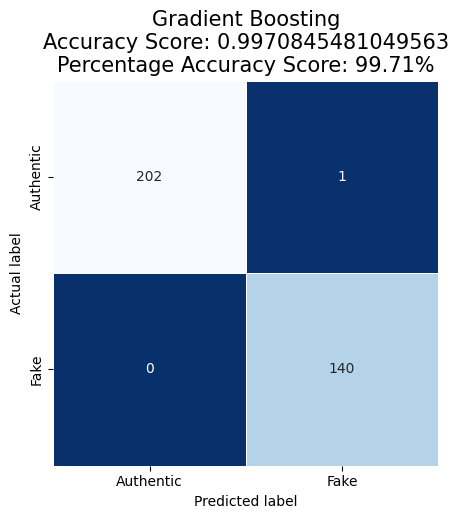

In [76]:
#print the confusion matrix

gradientBoostingAlgoPredCM = confusion_matrix(y_test, gradientBoostingAlgoPred)
plt.figure(figsize=(5,5))
sns.heatmap(gradientBoostingAlgoPredCM, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r', cbar=False, xticklabels=['Authentic', 'Fake'], yticklabels=['Authentic', 'Fake'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

accuracy_score = metrics.accuracy_score(y_test, gradientBoostingAlgoPred)
percentage_accuracy_score = f'{accuracy_score:.2%}'
all_sample_title = f'Gradient Boosting\nAccuracy Score: {accuracy_score}\nPercentage Accuracy Score: {percentage_accuracy_score}'
plt.title(all_sample_title, size = 15)
plt.show()

In [77]:
print(decisionTreeClassifierCM, metrics.accuracy_score(y_test, tree_predict))
print(gaussianAlgoPredCM, metrics.accuracy_score(y_test, gaussianAlgoPred))
print(gradientBoostingAlgoPredCM, metrics.accuracy_score(y_test, gradientBoostingAlgoPred))

[[201   2]
 [  2 138]] 0.9883381924198251
[[187  16]
 [ 30 110]] 0.8658892128279884
[[202   1]
 [  0 140]] 0.9970845481049563


### Save the model to disk
Use a python module pickle to save the model to disk. This same module can be used to load the model later. This is useful when you want to use the model in another program or share it with others. The model would be stored in a directory and be used in the streamlit app to predict the authenticity of a banknote.

In [78]:
# Save the models
import pickle
pickle.dump(clf, open('saved_models/gradientBoostingAlgoPredCM.pkl', 'wb'))
pickle.dump(clf, open('saved_models/gaussianAlgoPredCM.pkl', 'wb'))
pickle.dump(clf, open('saved_models/decisionTreeClassifierCM.pkl', 'wb'))

### Performance Evaluation of the three Machine Learning Algorithms

* Gradient boosting is the best model among the three, with an accuracy of 0.997 or 1 most of the time and only one error. It correctly classified all the real bank notes and almost all the fake bank notes. The Gradient boostong being accurate than the other two models is not surprising because it is an ensemble technique that combines multiple weak learners (such as decision trees) into a strong learner by iteratively adding new learners that correct the errors of the previous ones. In simple terms, a gradient boosting classifier learns from the mistakes of the previous classifiers and improves the accuracy of the final prediction.
* Decision tree is the second best model, with an accuracy of 0.988 and mostly behind Gradient boosting and four errors. It also correctly classified all the real bank notes, but misclassified four fake bank notes as real.
* Gaussian naive Bayes is the worst model, with an accuracy of 0.851 and always last and 51 errors. It misclassified 21 real bank notes as fake and 30 fake bank notes as real.

## This assignment is based on the work of Charles Nana Kwakye by the help of Bing AI, Bard AI and mostly knowledge from Thomas More University Course Artificial Intelligence .

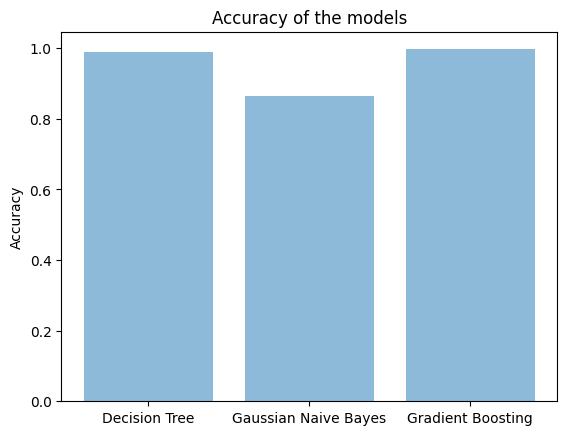

In [79]:
#plot a graph to show the accuracy of the models
import matplotlib.pyplot as plt
import numpy as np

objects = ('Decision Tree', 'Gaussian Naive Bayes', 'Gradient Boosting') # objects to be plotted on x-axis
y_pos = np.arange(len(objects)) # position of objects on y-axis
performance = [metrics.accuracy_score(y_test, tree_predict), metrics.accuracy_score(y_test, gaussianAlgoPred), metrics.accuracy_score(y_test, gradientBoostingAlgoPred)]

plt.bar(y_pos, performance, align='center', alpha=0.5) # plot a bar chart
plt.xticks(y_pos, objects) # set the labels for x-axis
plt.ylabel('Accuracy') # set the label for y-axis
plt.title('Accuracy of the models') # set the title of the graph
plt.show() # display the graph

